# Task 1: Data Preprocessing

Step 1: Data Loading

Objective:
Load your dataset into your working environment (e.g., Python).

Operations:
Read the CSV file (or any other format) that contains your dataset.
Verify that the data is loaded correctly by printing the first few rows.

In [1]:
# Example using Python's built-in functions (you can write your own file reader if you want to avoid libraries)

# Here is a very simple implementation assuming the data is in CSV format.
def load_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    # Remove any trailing newline characters and split columns by comma
    data = [line.strip().split(',') for line in lines]
    return data

data = load_data('student_performance.csv')

# Print first few rows
for row in data[:5]:
    print(row)

['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
['7', '99', 'Yes', '9', '1', '91.0']
['4', '82', 'No', '4', '2', '65.0']
['8', '51', 'Yes', '7', '2', '45.0']
['6', ' ', ' No', ' 8', ' 1', ' 78.0']


Step 2: Data Cleaning

    Objective:
        Ensure that your dataset is free from missing values and inconsistencies.

    Operations:
        Check for Missing Values:
            Look through the dataset to see if any fields are missing or blank.
        Handle Missing Data:
            You can choose to remove rows with missing values or fill them using an imputation method (e.g., mean, median).
        Validate Data Types:
            Make sure that numeric columns (e.g., Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced, Performance Index) contain numeric values.
    Example (Conceptual):

        If a row is missing the "Previous Scores" value, you might choose to drop that row or replace the missing value with the average of the column.

In [2]:
def clean_data(data):
    """
    Clean the dataset.
    Assumes:
      - data is a list of lists where the first row is the header.
      - The expected header columns are:
        "Hours Studied", "Previous Scores", "Extracurricular Activities", 
        "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"
    """
    header = data[0]
    rows = data[1:]
    cleaned_rows = []

    # Define the indices for the columns we need to convert to numbers
    try:
        hours_index = header.index("Hours Studied")
        scores_index = header.index("Previous Scores")
        sleep_index = header.index("Sleep Hours")
        sample_index = header.index("Sample Question Papers Practiced")
        performance_index = header.index("Performance Index")
    except ValueError as e:
        print("Error: Expected column not found in header.", e)
        return None

    for row in rows:
        # Check if row has the correct number of columns
        if len(row) != len(header):
            print(f"Skipping row (incorrect number of columns): {row}")
            continue

        try:
            # Convert numeric columns to float
            row[hours_index] = float(row[hours_index])
            row[scores_index] = float(row[scores_index])
            row[sleep_index] = float(row[sleep_index])
            row[sample_index] = float(row[sample_index])
            row[performance_index] = float(row[performance_index])
            
            # For now, we leave "Extracurricular Activities" as is (will encode later)
            # If any conversion fails, this row will be skipped.
            cleaned_rows.append(row)
        except Exception as e:
            print(f"Skipping row {row} due to conversion error: {e}")

    # Return the header along with the cleaned rows
    return [header] + cleaned_rows

# i added a row with missing data

print("Before Cleaning The Data:")
for row in data[:6]:
    print(row)

data = clean_data(data)
print("Cleaned Data:")
for row in data[:6]:
    print(row)


Before Cleaning The Data:
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
['7', '99', 'Yes', '9', '1', '91.0']
['4', '82', 'No', '4', '2', '65.0']
['8', '51', 'Yes', '7', '2', '45.0']
['6', ' ', ' No', ' 8', ' 1', ' 78.0']
['5', '52', 'Yes', '5', '2', '36.0']
Skipping row [6.0, ' ', ' No', ' 8', ' 1', ' 78.0'] due to conversion error: could not convert string to float: ' '
Cleaned Data:
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
[7.0, 99.0, 'Yes', 9.0, 1.0, 91.0]
[4.0, 82.0, 'No', 4.0, 2.0, 65.0]
[8.0, 51.0, 'Yes', 7.0, 2.0, 45.0]
[5.0, 52.0, 'Yes', 5.0, 2.0, 36.0]
[7.0, 75.0, 'No', 8.0, 5.0, 66.0]


Step 3: Encoding Categorical Variables
    
    Objective:
        Convert categorical variables into a numeric format that the model can understand.

    Operations:
        Identify the categorical column(s). In your dataset, "Extracurricular Activities" has values "Yes" or "No".
        Convert these categorical values into numeric form.
    For example:
        map "Yes" to 1 and "No" to 0.

In [3]:
# Assuming data is a list of lists and that the header is in the first row.
header = data[0]
rows = data[1:]

# Find the index of the "Extracurricular Activities" column
extracurricular_index = header.index("Extracurricular Activities")

# Convert "Yes" to 1 and "No" to 0 for all rows
for row in rows:
    if row[extracurricular_index].lower() == 'yes':
        row[extracurricular_index] = 1
    elif row[extracurricular_index].lower() == 'no':
        row[extracurricular_index] = 0
        
# Print first few rows
for row in rows[:5]:
    print(row)

[7.0, 99.0, 1, 9.0, 1.0, 91.0]
[4.0, 82.0, 0, 4.0, 2.0, 65.0]
[8.0, 51.0, 1, 7.0, 2.0, 45.0]
[5.0, 52.0, 1, 5.0, 2.0, 36.0]
[7.0, 75.0, 0, 8.0, 5.0, 66.0]


Step 4: Feature and Target Identification

    Objective:
        Determine which columns will be used as features (inputs) and which column is the target (output).

    Operations:
        Features:
            Hours Studied
            Previous Scores
            Extracurricular Activities (now numeric)
            Sleep Hours
            Sample Question Papers Practiced
        Target:
            Performance Index
    Note:
        Ensure all these columns are in numeric format. Convert any that aren't.

Summary of Task 1:

    Data Loading: Read the dataset and inspect its contents.
    Data Cleaning: Check for missing values and validate data types.
    Encoding Categorical Variables: Convert "Extracurricular Activities" to numeric (e.g., Yes = 1, No = 0).
    Feature and Target Identification: Define which columns are inputs (features) and which is the output (target).


# Task 2: Exploratory Data Analysis (EDA) and Feature Engineering

Step 1: Statistical Summary
    
    Objective:
        Get an overview of the distribution and basic statistics for each feature and the target variable.

    Operations:
        Calculate Basic Statistics:
            For each numeric column (Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced, and Performance Index), compute:
                Mean (average)
                Median
                Standard Deviation
                Minimum and Maximum values

In [4]:
def compute_statistics(data, header):
    # Assuming data is a list of lists (excluding the header)
    statistics = {}
    # Create a list for each column (except categorical if needed)
    columns = {col: [] for col in header}
    for row in data:
        for i, value in enumerate(row):
            # We'll treat all columns as numeric for now, 
            # but you can skip or process categorical separately.
            try:
                columns[header[i]].append(float(value))
            except:
                # For non-numeric values, simply skip converting
                columns[header[i]].append(value)

    # Compute statistics for numeric columns
    for col in header:
        try:
            values = columns[col]
            mean_val = sum(values) / len(values)
            sorted_vals = sorted(values)
            median_val = sorted_vals[len(values)//2]
            variance = sum((x - mean_val) ** 2 for x in values) / len(values)
            std_dev = variance ** 0.5
            statistics[col] = {
                "mean": mean_val,
                "median": median_val,
                "std_dev": std_dev,
                "min": min(values),
                "max": max(values)
            }
        except Exception as e:
            # Skip statistics for non-numeric columns
            statistics[col] = f"Non-numeric or error: {e}"
    return statistics

# Example usage:
stats = compute_statistics(rows, header)
for col, stat in stats.items():
    print(f"{col}: {stat}")


Hours Studied: {'mean': 4.9929, 'median': 5.0, 'std_dev': 2.589179327509005, 'min': 1.0, 'max': 9.0}
Previous Scores: {'mean': 69.4457, 'median': 69.0, 'std_dev': 17.34228507175449, 'min': 40.0, 'max': 99.0}
Extracurricular Activities: {'mean': 0.4948, 'median': 0.0, 'std_dev': 0.4999729592688043, 'min': 0.0, 'max': 1.0}
Sleep Hours: {'mean': 6.5306, 'median': 7.0, 'std_dev': 1.6957781812488417, 'min': 4.0, 'max': 9.0}
Sample Question Papers Practiced: {'mean': 4.5833, 'median': 5.0, 'std_dev': 2.867204406734922, 'min': 0.0, 'max': 9.0}
Performance Index: {'mean': 55.2248, 'median': 55.0, 'std_dev': 19.21159714755645, 'min': 10.0, 'max': 100.0}


Step 2: Data Visualization
    
    Objective:
        Visualize the relationships between features and the target variable to gain insights into potential linear relationships and detect anomalies or outliers.

    Operations:
        Scatter Plots:
            Plot each feature against the target (Performance Index). This helps you see if there is a linear trend.
        Histograms and Box Plots:
            Create histograms or box plots for each numeric feature to inspect their distribution and check for outliers.

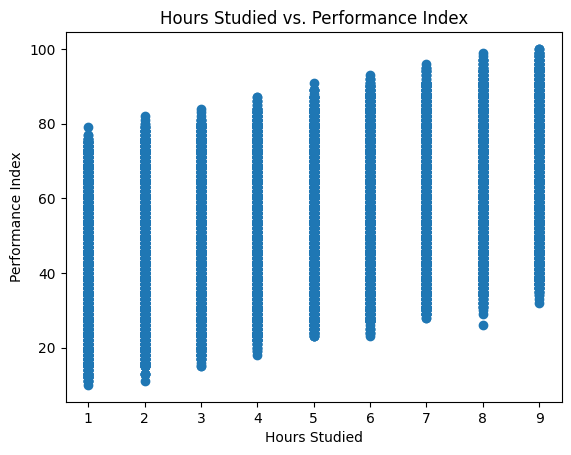

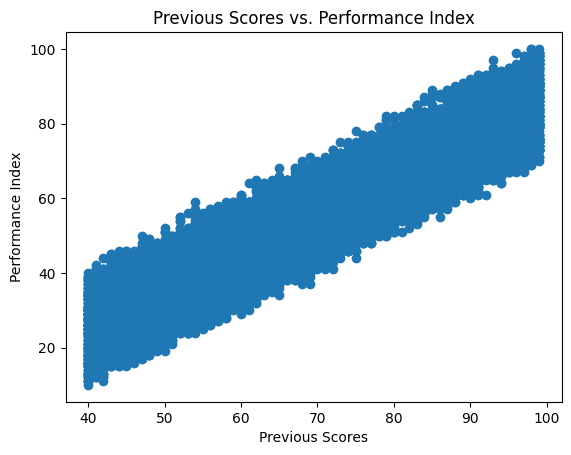

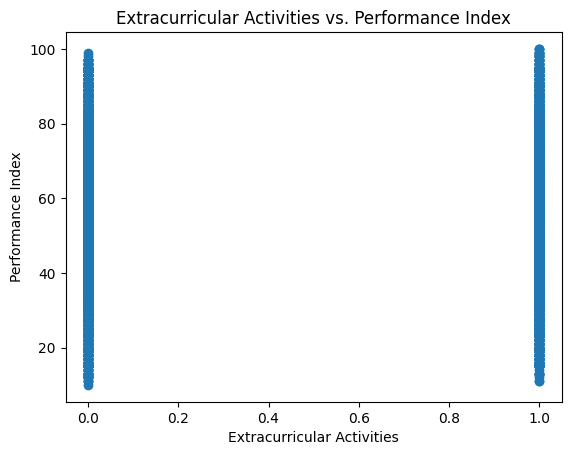

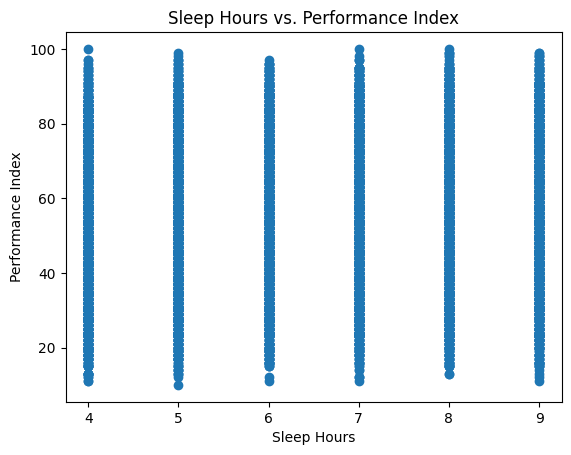

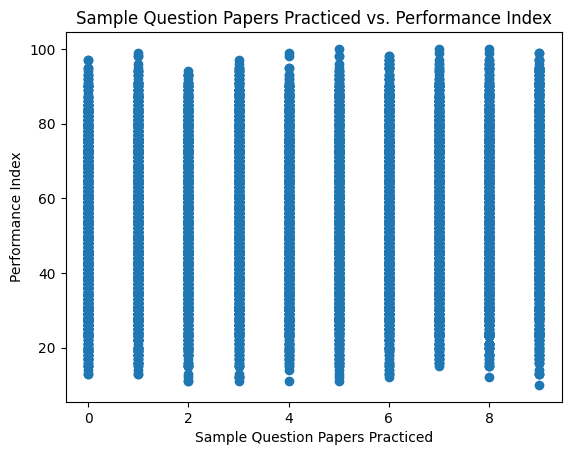

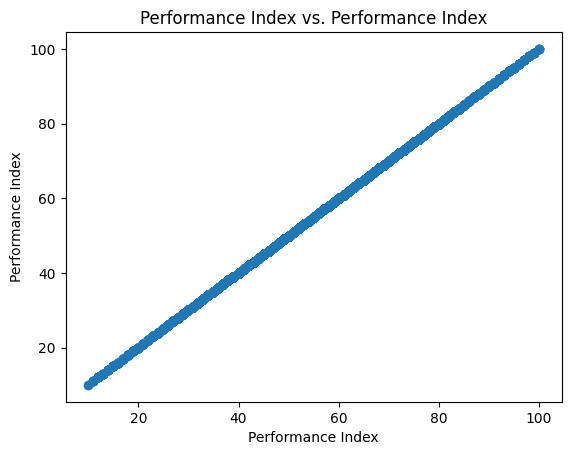

In [5]:
import matplotlib.pyplot as plt # type: ignore

def plot_feature_vs_target(data, header, feature_name, target_name):
    feature_index = header.index(feature_name)
    target_index = header.index(target_name)
    feature_values = [float(row[feature_index]) for row in data]
    target_values = [float(row[target_index]) for row in data]

    plt.scatter(feature_values, target_values)
    plt.title(f"{feature_name} vs. {target_name}")
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.show()

# Example: Plot "Hours Studied" vs. "Performance Index"
for feature in header:
    plot_feature_vs_target(rows, header, feature, "Performance Index")

Step 3: Correlation Analysis

Compute the correlation matrix between features and the target to see which features might have a strong linear relationship with Performance Index.

In [6]:
def compute_correlation(data, header, feature1, feature2):
    idx1 = header.index(feature1)
    idx2 = header.index(feature2)
    x_vals = [float(row[idx1]) for row in data]
    y_vals = [float(row[idx2]) for row in data]
    mean_x = sum(x_vals) / len(x_vals)
    mean_y = sum(y_vals) / len(y_vals)
    numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_vals, y_vals))
    denominator = (sum((x - mean_x)**2 for x in x_vals) * sum((y - mean_y)**2 for y in y_vals)) ** 0.5
    return numerator / denominator if denominator != 0 else 0

# Compute correlation between each feature and Performance Index
target = "Performance Index"
for feature in header:
    if feature != target:
        corr = compute_correlation(rows, header, feature, target)
        print(f"Correlation between {feature} and {target}: {corr:.2f}")


Correlation between Hours Studied and Performance Index: 0.37
Correlation between Previous Scores and Performance Index: 0.92
Correlation between Extracurricular Activities and Performance Index: 0.02
Correlation between Sleep Hours and Performance Index: 0.05
Correlation between Sample Question Papers Practiced and Performance Index: 0.04


Step 4: Feature Scaling

    Objective:
        Scale features to ensure they are on a similar scale, which helps the gradient descent algorithm converge more smoothly.

    Operations:
        Normalization (Min-Max Scaling):
            Rescale features to a range of [0, 1]
 
        Standardization:
            Transform features so they have a mean of 0 and a standard deviation of 1

For our "Student Performance" dataset and model, I recommend standardizing the data rather than normalizing it. Here’s why:

    Different Feature Scales:
        Our dataset includes features such as "Hours Studied" (which might be on a scale of 0–10 or more), "Previous Scores" (likely on a 0–100 scale), "Sleep Hours," and others. Standardization transforms each feature so that it has a mean of 0 and a standard deviation of 1, which is very useful when the features come in different scales.

    Improved Convergence in Gradient Descent:
        Since we'll be training our linear regression model from scratch using gradient descent, standardization is beneficial. It centers the data and ensures that all features contribute equally to the gradient updates, which generally leads to faster and more stable convergence. With normalization, extreme values (or a bounded scale like [0, 1]) might not handle outliers or varying variances as effectively, especially when features have different variances.

    Interpretability of Coefficients:
        When features are standardized, the learned coefficients represent the change in the target variable for a one standard deviation change in the feature. This can provide a clearer understanding of each feature's relative importance in predicting the "Performance Index."

    Flexibility and Robustness:
        Standardization does not force all values into a specific bounded range (like [0, 1]), which can be useful if your data does not naturally fit into that range or if there are outliers. Normalization could compress the values of the majority of the data if a few extreme values are present, potentially distorting the learning process.

In [7]:
import copy

def standardize_feature(data, header, feature_name):
    """
    Standardize the specified feature in the dataset.
    
    For each feature, compute the mean and standard deviation, and then update
    the feature values using the formula:
        x_std = (x - mean) / std_dev
    """
    idx = header.index(feature_name)
    # Extract the feature values and convert them to float
    values = [float(row[idx]) for row in data]
    # Calculate the mean
    mean_val = sum(values) / len(values)
    # Calculate the variance and then the standard deviation
    variance = sum((x - mean_val) ** 2 for x in values) / len(values)
    std_val = variance ** 0.5
    
    # Update each row with the standardized value
    for row in data:
        row[idx] = (float(row[idx]) - mean_val) / std_val
    return data

# Suppose 'rows' is our data (list of lists without the header)
# and 'header' is the list of column names.
# For example:
header = ["Hours Studied", "Previous Scores", "Extracurricular Activities", 
          "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]

# Let's make a copy of rows to compare before and after standardization.
original_rows = copy.deepcopy(rows)

# Standardize a few features.
for feature in ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]:
    rows = standardize_feature(rows, header, feature)

print("Before Standardization:")
print(original_rows[:5])

print("\nAfter Standardization:")
print(rows[:5])


Before Standardization:
[[7.0, 99.0, 1, 9.0, 1.0, 91.0], [4.0, 82.0, 0, 4.0, 2.0, 65.0], [8.0, 51.0, 1, 7.0, 2.0, 45.0], [5.0, 52.0, 1, 5.0, 2.0, 36.0], [7.0, 75.0, 0, 8.0, 5.0, 66.0]]

After Standardization:
[[0.7751877124443864, 1.7041756537686783, 1, 1.4562046070090553, -1.249753938569223, 1.8621668841598782], [-0.3834805837706297, 0.7239126763316376, 0, -1.492294232808421, -0.9009821531844594, 0.5088176649198226], [1.1614104778493919, -1.0636256942888485, 1, 0.2768050710820648, -0.9009821531844594, -0.5322201960340662], [0.002742181634375665, -1.0059631662043167, 1, -0.9025944648449257, -0.9009821531844594, -1.0006872334633163], [0.7751877124443864, 0.3202749797399149, 0, 0.8665048390455601, 0.14533320296983077, 0.560869557967517]]


Old result:

    Hours Studied: {'mean': 4.9929, 'median': 5.0, 'std_dev': 2.589179327509004, 'min': 1.0, 'max': 9.0}
    Previous Scores: {'mean': 69.4457, 'median': 69.0, 'std_dev': 17.342285071754482, 'min': 40.0, 'max': 99.0}
    Extracurricular Activities: {'mean': 0.4948, 'median': 0.0, 'std_dev': 0.4999729592688028, 'min': 0.0, 'max': 1.0}
    Sleep Hours: {'mean': 6.5306, 'median': 7.0, 'std_dev': 1.6957781812488448, 'min': 4.0, 'max': 9.0}
    Sample Question Papers Practiced: {'mean': 4.5833, 'median': 5.0, 'std_dev': 2.867204406734915, 'min': 0.0, 'max': 9.0}
    Performance Index: {'mean': 55.2248, 'median': 55.0, 'std_dev': 19.21159714755641, 'min': 10.0, 'max': 100.0}

In [8]:
print("New Result:")
stats = compute_statistics(rows, header)
for col, stat in stats.items():
    print(f"{col}: {stat}")

New Result:
Hours Studied: {'mean': 8.457679001594443e-17, 'median': 0.002742181634375665, 'std_dev': 0.9999999999999997, 'min': -1.5421488799856458, 'max': 1.547633243254397}
Previous Scores: {'mean': -1.2654877146189847e-16, 'median': -0.025700188767275957, 'std_dev': 1.0000000000000058, 'min': -1.6979135032186985, 'max': 1.7041756537686783}
Extracurricular Activities: {'mean': 0.4948, 'median': 0.0, 'std_dev': 0.4999729592688043, 'min': 0.0, 'max': 1.0}
Sleep Hours: {'mean': 6.262323992700658e-16, 'median': 0.2768050710820648, 'std_dev': 1.0000000000001024, 'min': -1.492294232808421, 'max': 1.4562046070090553}
Sample Question Papers Practiced: {'mean': -1.9195756095768958e-16, 'median': 0.14533320296983077, 'std_dev': 0.9999999999999893, 'min': -1.5985257239539863, 'max': 1.5404203445088844}
Performance Index: {'mean': -1.0113021531310551e-16, 'median': -0.01170126555712181, 'std_dev': 1.0000000000000009, 'min': -2.354036452703372, 'max': 2.3306339215891283}


Step 4: Feature Engineering

    Objective:
        Enhance your dataset by creating additional features that might capture relationships not visible from the original features. This step is optional but can help improve the model if you suspect interactions between features.

    Operations:
        Interaction Terms:
            For example, if you suspect that the combined effect of "Hours Studied" and "Sleep Hours" impacts performance, create an interaction feature.

    Polynomial Features (Optional):
        You might add squared or higher-order terms if you think there is a non-linear relationship that a simple linear model cannot capture.

In [9]:
def add_interaction_feature(data, header, feature1, feature2, new_feature_name):
    idx1 = header.index(feature1)
    idx2 = header.index(feature2)
    header.append(new_feature_name)
    for row in data:
        # Calculate the interaction term as the product of the two features
        interaction_value = float(row[idx1]) * float(row[idx2])
        row.append(interaction_value)
    return data, header

# Add an interaction feature between "Hours Studied" and "Sleep Hours"
rows, header = add_interaction_feature(rows, header, "Hours Studied", "Sleep Hours", "Study_Sleep_Interaction")
print("Data after adding an interaction feature:")
print(header)
print(row[:10])

Data after adding an interaction feature:
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index', 'Study_Sleep_Interaction']
[0.7751877124443864, 0.3202749797399149, 0, 0.8665048390455601, 0.14533320296983077, 0.560869557967517, 0.671703904001719]


# Task 3: Model Building and Training

Step 1: Preparing the Data for Training
    Objective:
        Separate your dataset into features (X) and target (y), and then split these into training and testing sets.

In [10]:
import random

# Separate features (X) and target (y)
X = [row[:-1] for row in rows]  # All columns except the last column
y = [row[-1] for row in rows]   # The last column is the target

# Combine X and y, shuffle, and then split
combined = list(zip(X, y))
random.shuffle(combined)
X[:], y[:] = zip(*combined)

# Split into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

print("rows:", len(rows))
print("X_train:", len(X_train))
print("y_train:", len(y_train))
print("X_test:", len(X_test))
print("y_test:", len(y_test))

print("X_train:", X_train[:5])
print("y_train:", y_train[:5])
print("X_test:", X_test[:5])
print("y_test:", y_test[:5])


rows: 10000
X_train: 8000
y_train: 8000
X_test: 2000
y_test: 2000
X_train: [[0.7751877124443864, 0.5509250920780422, 0, 0.8665048390455601, 1.191648559124121, 0.7690771301582948], [-1.5421488799856458, -1.524925918965103, 0, 1.4562046070090553, -1.5985257239539863, -2.0937769874648997], [-0.3834805837706297, 1.1275503729233602, 1, 0.8665048390455601, -1.249753938569223, 0.9252328093013782], [0.7751877124443864, 0.6662501482471058, 0, -0.31289469688143046, -1.5985257239539863, 0.7690771301582948], [-0.7697033491756351, 0.4932625639935104, 1, -1.492294232808421, -0.552210367799696, 0.09240252053826709]]
y_train: [0.671703904001719, -2.245684303728952, -0.3322877815172669, -0.24255212431149578, 1.1486238689481265]
X_test: [[1.547633243254397, -0.7753130538661895, 1, 0.2768050710820648, 1.191648559124121, -0.1158050516525107], [0.002742181634375665, -0.42933788535899864, 0, 1.4562046070090553, -1.249753938569223, -0.6363239821294552], [-1.1559261145806405, -1.1789507504579122, 0, 0.8665048

Step 2: Model Formulation (Hypothesis Function)

    Objective:
        Define the hypothesis (prediction) function for multiple linear regression.

    Implementation Outline:
        Represent the weights as a list (or vector) of the same length as the number of features.
        The bias is a separate scalar value.
        Given an input row, the prediction is computed as the dot product of the weight vector and the feature vector plus the bias.

In [11]:
def predict(features, weights, bias):
    """
    Predict the target value for a single example.
    
    Arguments:
      features : List of feature values (all as floats).
      weights  : List of weights corresponding to each feature.
      bias     : Bias term.
    
    Returns:
      prediction (float)
    """
    prediction = bias
    for w, x in zip(weights, features):
        prediction += w * float(x)
    return prediction

Make sure that your header list reflects the order of the features you are using for prediction. If you engineered new features (e.g., an interaction term), include them accordingly.

Step 3: Defining the Cost Function
    Objective:
        Define a cost function that measures how far the model's predictions are from the actual target values. We will use Mean Squared Error (MSE).

In [12]:
def compute_cost(X, y, weights, bias):
    """
    Compute the Mean Squared Error for given data.
    
    Arguments:
      X       : List of feature vectors (each a list).
      y       : List of actual target values.
      weights : List of weights.
      bias    : Bias term.
      
    Returns:
      cost (float)
    """
    m = len(X)
    total_error = 0.0
    for features, actual in zip(X, y):
        prediction = predict(features, weights, bias)
        error = prediction - float(actual)
        total_error += error ** 2
    cost = total_error / m
    return cost

If your data row separates features from the target (for instance, if your feature vector is in one list and the target in another), adjust the code accordingly.

Step 4: Deriving and Implementing the Gradients
    Objective:
        Compute the gradients (partial derivatives) of the cost function with respect to each weight and the bias.

In [13]:
def compute_gradients(X, y, weights, bias):
    """
    Compute gradients for weights and bias.
    
    Arguments:
      X       : List of feature vectors.
      y       : List of actual target values.
      weights : List of current weights.
      bias    : Current bias.
      
    Returns:
      grad_weights : List of gradients for weights.
      grad_bias    : Gradient for bias.
    """
    m = len(X)
    grad_weights = [0.0 for _ in weights]
    grad_bias = 0.0

    for features, actual in zip(X, y):
        prediction = predict(features, weights, bias)
        error = prediction - float(actual)
        for j in range(len(weights)):
            grad_weights[j] += error * float(features[j])
        grad_bias += error
    
    # Average gradients (with factor 2 for MSE)
    grad_weights = [(2 / m) * gw for gw in grad_weights]
    grad_bias = (2 / m) * grad_bias
    
    return grad_weights, grad_bias

Step 5: Implementing Gradient Descent and Training the Model
    Objective:
        Use the computed gradients to update the weights and bias iteratively until convergence.

In [17]:
def gradient_descent(X, y, iterations, learning_rate):
    """
    Run gradient descent to optimize weights and bias.
    
    Arguments:
      X             : List of feature vectors (training data).
      y             : List of target values (training data).
      iterations    : Number of iterations to run.
      learning_rate : Learning rate (alpha).
      
    Returns:
      weights, bias, cost_history
    """
    num_features = len(X[0])
    weights = [0.0 for _ in range(num_features)]
    bias = 10.0
    cost_history = []
    
    for i in range(iterations):
        grad_weights, grad_bias = compute_gradients(X, y, weights, bias)
        
        # Update weights and bias
        weights = [w - learning_rate * gw for w, gw in zip(weights, grad_weights)]
        bias = bias - learning_rate * grad_bias
        
        # Compute cost to monitor training progress
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)
        
        # Optionally, print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return weights, bias, cost_history

# Set hyperparameters for training
iterations = 1000
learning_rate = 0.001

# Train the model on the training set
trained_weights, trained_bias, cost_history = gradient_descent(X_train, y_train, iterations, learning_rate)

print("Trained weights:", trained_weights)
print("Trained bias:", trained_bias)


Iteration 0: Cost = 100.4865
Iteration 100: Cost = 61.7331
Iteration 200: Cost = 38.6270
Iteration 300: Cost = 24.8077
Iteration 400: Cost = 16.5032
Iteration 500: Cost = 11.4768
Iteration 600: Cost = 8.4017
Iteration 700: Cost = 6.4905
Iteration 800: Cost = 5.2761
Iteration 900: Cost = 4.4807
Trained weights: [-0.012291323886337174, -0.005179631601739576, -2.7153229583773046, -0.017671321487043413, 0.011888702576724712, 0.031110258940825055]
Trained bias: 2.4008549229287275


In [18]:
def gradient_descent(X, y, iterations, learning_rate, weights, bias):
    """
    Run gradient descent to optimize weights and bias.
    
    Arguments:
      X             : List of feature vectors (training data).
      y             : List of target values (training data).
      iterations    : Number of iterations to run.
      learning_rate : Learning rate (alpha).
      
    Returns:
      weights, bias, cost_history
    """
    
    for i in range(iterations):
        grad_weights, grad_bias = compute_gradients(X, y, weights, bias)
        
        # Update weights and bias
        weights = [w - learning_rate * gw for w, gw in zip(weights, grad_weights)]
        bias = bias - learning_rate * grad_bias
        
        # Compute cost to monitor training progress
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)
        
        # Optionally, print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return weights, bias, cost_history

# Set hyperparameters for training
iterations = 1000
learning_rate = 0.01

# Train the model on the training set
trained_weights, trained_bias, cost_history = gradient_descent(X_train, y_train, iterations, learning_rate, trained_weights, trained_bias)

print("Trained weights:", trained_weights)
print("Trained bias:", trained_bias)


Iteration 0: Cost = 3.8992
Iteration 100: Cost = 2.1263
Iteration 200: Cost = 1.5244
Iteration 300: Cost = 1.2462
Iteration 400: Cost = 1.1170
Iteration 500: Cost = 1.0570
Iteration 600: Cost = 1.0292
Iteration 700: Cost = 1.0162
Iteration 800: Cost = 1.0102
Iteration 900: Cost = 1.0075
Trained weights: [-0.028133129643327523, -0.09436882031495797, -0.07439193495457418, -0.00446123728721408, -0.0052977842630267, 0.09497449116270988]
Trained bias: 0.045617169805701276


In [19]:
def gradient_descent(X, y, iterations, learning_rate, weights, bias):
    """
    Run gradient descent to optimize weights and bias.
    
    Arguments:
      X             : List of feature vectors (training data).
      y             : List of target values (training data).
      iterations    : Number of iterations to run.
      learning_rate : Learning rate (alpha).
      
    Returns:
      weights, bias, cost_history
    """
    
    for i in range(iterations):
        grad_weights, grad_bias = compute_gradients(X, y, weights, bias)
        
        # Update weights and bias
        weights = [w - learning_rate * gw for w, gw in zip(weights, grad_weights)]
        bias = bias - learning_rate * grad_bias
        
        # Compute cost to monitor training progress
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)
        
        # Optionally, print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return weights, bias, cost_history

# Set hyperparameters for training
iterations = 1000
learning_rate = 0.001

# Train the model on the training set
trained_weights, trained_bias, cost_history = gradient_descent(X_train, y_train, iterations, learning_rate, trained_weights, trained_bias)

print("Trained weights:", trained_weights)
print("Trained bias:", trained_bias)


Iteration 0: Cost = 1.0062
Iteration 100: Cost = 1.0061
Iteration 200: Cost = 1.0060
Iteration 300: Cost = 1.0059
Iteration 400: Cost = 1.0059
Iteration 500: Cost = 1.0058
Iteration 600: Cost = 1.0057
Iteration 700: Cost = 1.0057
Iteration 800: Cost = 1.0056
Iteration 900: Cost = 1.0056
Trained weights: [-0.028664045759384953, -0.0958690208970139, -0.05361848980819154, -0.004192944659515865, -0.00548441882070038, 0.09639789021961843]
Trained bias: 0.032856907468616116


In [21]:
print(X_train[0])
print(y_train[0])
print(predict(X_train[0], trained_weights, trained_bias))

[0.7751877124443864, 0.5509250920780422, 0, 0.8665048390455601, 1.191648559124121, 0.7690771301582948]
0.671703904001719
0.02178894838265509
